# Import and Ingest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [2]:
df = pd.read_csv('data.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace = True)
print(df.shape)  # (123, 8)
df.tail()

(2733, 12)


,Bitcoin,Bitcoin Crash,Blockchain,Crisis,Cryptocurrency,Nicehash,Hashing,GPU,GeForce,mining,Tesla,Price
date,,,,,,,,,,,,
2022-06-21,18.36,2.75,18.24,41.31,12.42,8.04,48.0,63.92,41.83,50.05,76.36,21620.628906
2022-06-22,15.84,6.25,19.44,37.74,11.34,6.72,49.5,62.56,35.72,47.85,71.38,20835.750000
2022-06-23,12.96,5.00,16.80,43.35,11.07,4.68,38.5,63.24,31.96,50.05,73.04,21135.761719
2022-06-24,11.52,2.00,14.64,37.23,9.72,0.00,38.5,59.84,31.49,41.25,68.06,21472.917969
2022-06-25,10.08,1.75,13.92,33.66,9.99,7.44,23.5,63.92,39.95,51.70,59.76,21520.914062


# Visualize the Time Series

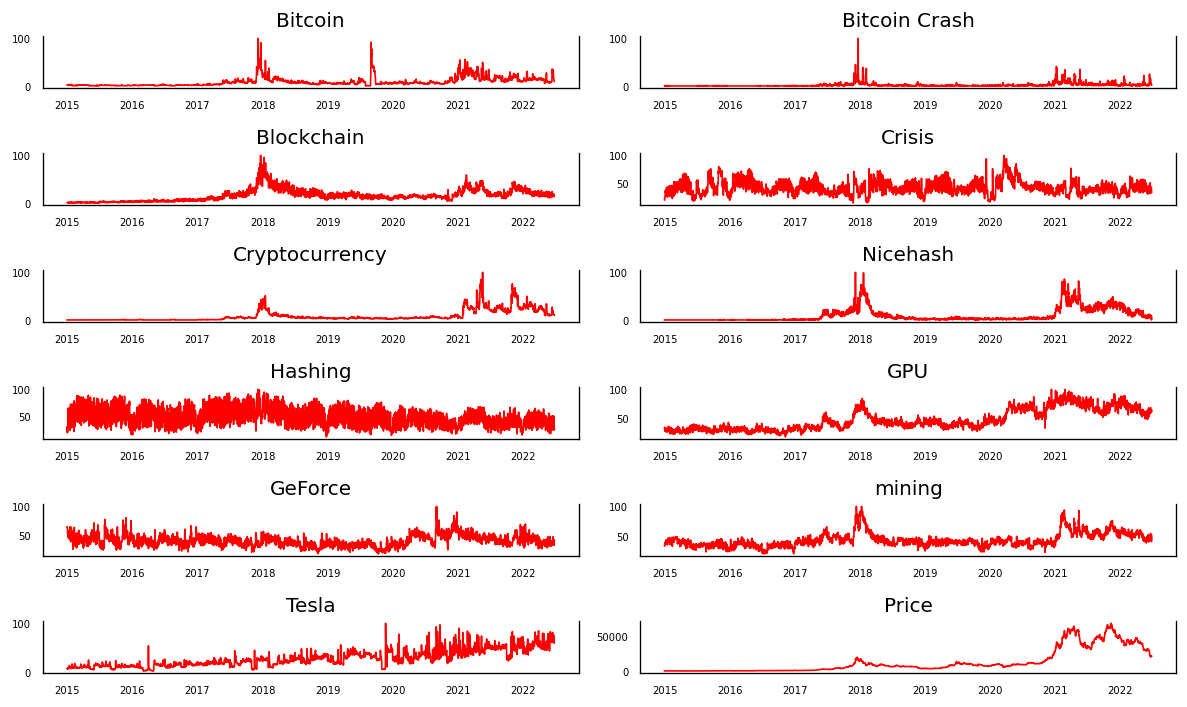

In [3]:
# Plot
fig, axes = plt.subplots(nrows=6, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# Testing Causation using Granger’s Causality Test

In [4]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)    

,Bitcoin_x,Bitcoin Crash_x,Blockchain_x,Crisis_x,Cryptocurrency_x,Nicehash_x,Hashing_x,GPU_x,GeForce_x,mining_x,Tesla_x,Price_x
Bitcoin_y,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2169,0.0000,0.0000,0.0000
Bitcoin Crash_y,0.0000,1.0000,0.0000,0.0287,0.0000,0.0000,0.0730,0.0000,0.0214,0.0000,0.0000,0.0000
Blockchain_y,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0011,0.0000,0.0000,0.0000
Crisis_y,0.0006,0.0011,0.0000,1.0000,0.0018,0.0039,0.0000,0.0000,0.0000,0.0000,0.0000,0.0093
Cryptocurrency_y,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.7173,0.0000,0.0000,0.0000
Nicehash_y,0.0000,0.0000,0.0000,0.0824,0.0000,1.0000,0.1570,0.0000,0.3734,0.0000,0.0002,0.0000
Hashing_y,0.0199,0.1901,0.0000,0.0000,0.0000,0.0019,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
GPU_y,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
GeForce_y,0.0260,0.0043,0.0000,0.0000,0.0013,0.0043,0.0000,0.0000,1.0000,0.0000,0.0000,0.0003
mining_y,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0016,0.0000


# Cointegration Test

In [5]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name            ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col, 15), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name            ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Bitcoin         ::  980.45    > 311.1288  =>   True
Bitcoin Crash   ::  761.58    > 263.2603  =>   True
Blockchain      ::  594.64    > 219.4051  =>   True
Crisis          ::  455.96    > 179.5199  =>   True
Cryptocurrency  ::  334.46    > 143.6691  =>   True
Nicehash        ::  228.5     > 111.7797  =>   True
Hashing         ::  132.26    > 83.9383   =>   True
GPU             ::  78.56     > 60.0627   =>   True
GeForce         ::  33.63     > 40.1749   =>   False
mining          ::  11.78     > 24.2761   =>   False
Tesla           ::  2.69      > 12.3212   =>   False
Price           ::  0.12      > 4.1296    =>   False


# Split the Series into Training and Testing Data

In [6]:
nobs = 16
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)
print(df_test.shape)

(2717, 12)
(16, 12)


# Check for Stationarity and Make the Time Series Stationary

In [7]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
        return True
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 
        return False
# ADF Test on each column
stationary = True
for name, column in df_train.iteritems():
    temp = adfuller_test(column, name=column.name)
    stationary = stationary and temp
    print('\n')
if stationary:
    print('Proceed')
else:
    print('Need differencing')

    Augmented Dickey-Fuller Test on "Bitcoin" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.9807
 No. Lags Chosen       = 24
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Bitcoin Crash" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.8525
 No. Lags Chosen       = 27
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Blockchain" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significa

## 1st difference

In [8]:
df_differenced = df_train.diff().dropna()
# ADF Test on each column of 1st Differences Dataframe
stationary = True
for name, column in df_differenced.iteritems():
    temp = adfuller_test(column, name=column.name)
    stationary = stationary and temp
    print('\n')
if stationary:
    print('Proceed')
else:
    print('Need differencing')

    Augmented Dickey-Fuller Test on "Bitcoin" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -13.3527
 No. Lags Chosen       = 26
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Bitcoin Crash" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -13.663
 No. Lags Chosen       = 28
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Blockchain" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Signific

# Select the Order (P) of VAR model

In [9]:
model = VAR(df_differenced)
x = model.select_order(maxlags=20)
x.summary()

C:\Users\Public\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,47.66,47.68,4.980e+20,47.67
1,46.54,46.88,1.625e+20,46.66
2,45.82,46.48,7.927e+19,46.06
3,45.58,46.55,6.214e+19,45.93
4,45.20,46.49,4.264e+19,45.66
5,44.39,45.99,1.903e+19,44.97
6,44.04,45.96*,1.342e+19,44.74
7,43.90,46.14,1.168e+19,44.71*
8,43.87,46.41,1.124e+19,44.79
9,43.87,46.73,1.126e+19,44.90


# Train the VAR Model of Selected Order(p)

In [10]:
model_fitted = model.fit(16)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 28, Jun, 2022
Time:                     16:16:46
--------------------------------------------------------------------
No. of Equations:         12.0000    BIC:                    48.6529
Nobs:                     2700.00    HQIC:                   45.4216
Log likelihood:          -102506.    FPE:                8.56371e+18
AIC:                      43.5911    Det(Omega_mle):     3.73978e+18
--------------------------------------------------------------------
Results for equation Bitcoin
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                     -0.009912         0.062006           -0.160           0.873
L1.Bitcoin                -0.128186         0.027325           -4.691           0.000
L1.Bitcoin Crash          -0.051078   

# Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

The value of this statistic can vary between 0 and 4. The closer it is to the value 2, then there is no significant serial correlation. The closer to 0, there is a positive serial correlation, and the closer it is to 4 implies negative serial correlation.

In [11]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))

Bitcoin : 2.0
Bitcoin Crash : 2.03
Blockchain : 2.0
Crisis : 2.01
Cryptocurrency : 2.0
Nicehash : 2.0
Hashing : 2.0
GPU : 2.01
GeForce : 2.0
mining : 1.99
Tesla : 2.0
Price : 1.99


# Forecast VAR model using statsmodels

In [12]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

16


array([[-1.96000000e+00, -6.60000000e-01, -2.75000000e+00,
         1.71000000e+00, -1.70000000e+00,  2.40000000e+00,
         1.59500000e+01,  1.95000000e+00, -3.22000000e+00,
        -1.65000000e+00, -7.11000000e+00,  3.83429688e+02],
       [ 5.60000000e-01, -4.40000000e-01,  2.00000000e+00,
        -1.14000000e+00,  1.70000000e+00, -2.60000000e+00,
        -2.75000000e+00, -1.30000000e+00, -4.60000000e-01,
        -5.50000000e-01, -1.58000000e+00, -3.23625000e+02],
       [ 2.80000000e-01,  1.10000000e+00, -4.00000000e+00,
        -3.99000000e+00, -3.40000000e-01,  2.80000000e+00,
        -6.60000000e+00, -5.85000000e+00, -8.28000000e+00,
         3.85000000e+00,  1.58000000e+00, -4.87216797e+02],
       [-8.40000000e-01,  4.40000000e-01, -4.25000000e+00,
        -1.08300000e+01,  2.72000000e+00, -3.20000000e+00,
        -2.80500000e+01,  1.95000000e+00,  7.82000000e+00,
        -2.20000000e+00, -7.90000000e+00, -5.32042969e+02],
       [-1.12000000e+00, -2.64000000e+00,  0.0000000

In [13]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_1d')
df_forecast

,Bitcoin_1d,Bitcoin Crash_1d,Blockchain_1d,Crisis_1d,Cryptocurrency_1d,Nicehash_1d,Hashing_1d,GPU_1d,GeForce_1d,mining_1d,Tesla_1d,Price_1d
date,,,,,,,,,,,,
2022-06-10,0.659138,0.243281,-1.404450,-4.745358,-0.337496,2.023588,-7.770220,-3.915092,3.899090,2.059135,-1.189861,-176.035520
2022-06-11,1.661302,0.065262,-0.075936,-5.545934,-0.343689,3.417644,-16.953216,1.447583,0.890983,-0.245904,-5.999975,8.686533
2022-06-12,-0.713150,0.303380,-2.241290,0.861895,-1.228435,-1.053537,0.303993,0.439145,0.227545,2.537058,-2.110073,-100.758360
2022-06-13,0.530816,-0.648281,2.523814,6.174041,-0.212597,-0.536140,12.976163,-1.459472,-3.776885,1.658125,2.793536,-26.973723
2022-06-14,0.651489,0.346557,1.968035,2.561460,0.037614,-0.922558,7.707637,0.349828,1.235832,0.716918,3.929649,482.588948
2022-06-15,-0.944698,-0.517173,0.044554,0.542716,0.221703,-1.390534,1.239853,1.339334,0.673036,-2.013143,1.703072,-91.152477
2022-06-16,-1.218631,-1.178454,-1.391181,-2.986057,-0.561340,-1.330553,0.437844,-0.146614,-0.637104,-1.235371,-0.382715,-33.660741
2022-06-17,-0.026893,0.225270,-0.379653,-3.586296,0.400501,0.099395,-5.918416,0.490343,2.382708,-0.903707,-0.269947,-13.799675
2022-06-18,-0.255068,0.797376,-1.336783,-5.705958,0.549516,1.625885,-16.496174,-1.292534,0.516152,-0.804303,-4.691187,-101.852223


# Invert the transformation to get the real forecast

In [14]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [15]:
df_results = invert_transformation(df_train, df_forecast, second_diff=False)
cols = [s + '_forecast' for s in df.columns.values.tolist()]
df_results.loc[:, cols]

,Bitcoin_forecast,Bitcoin Crash_forecast,Blockchain_forecast,Crisis_forecast,Cryptocurrency_forecast,Nicehash_forecast,Hashing_forecast,GPU_forecast,GeForce_forecast,mining_forecast,Tesla_forecast,Price_forecast
date,,,,,,,,,,,,
2022-06-10,8.939138,2.743281,15.875550,36.054642,9.652504,5.383588,35.229780,55.924908,36.799090,42.759135,70.190139,30433.275027
2022-06-11,10.600440,2.808543,15.799614,30.508708,9.308815,8.801232,18.276564,57.372491,37.690074,42.513231,64.190164,30441.961560
2022-06-12,9.887290,3.111923,13.558323,31.370604,8.080380,7.747695,18.580557,57.811637,37.917619,45.050289,62.080091,30341.203200
2022-06-13,10.418107,2.463642,16.082137,37.544645,7.867783,7.211555,31.556719,56.352165,34.140734,46.708414,64.873627,30314.229476
2022-06-14,11.069596,2.810198,18.050172,40.106105,7.905397,6.288997,39.264356,56.701992,35.376566,47.425332,68.803277,30796.818424
2022-06-15,10.124898,2.293025,18.094725,40.648821,8.127100,4.898462,40.504209,58.041326,36.049602,45.412189,70.506349,30705.665947
2022-06-16,8.906268,1.114571,16.703545,37.662764,7.565760,3.567910,40.942054,57.894712,35.412499,44.176818,70.123634,30672.005206
2022-06-17,8.879375,1.339842,16.323892,34.076468,7.966261,3.667305,35.023638,58.385056,37.795207,43.273111,69.853687,30658.205530
2022-06-18,8.624308,2.137218,14.987109,28.370509,8.515777,5.293191,18.527464,57.092522,38.311358,42.468808,65.162501,30556.353308


# Plot of Forecast vs Actuals

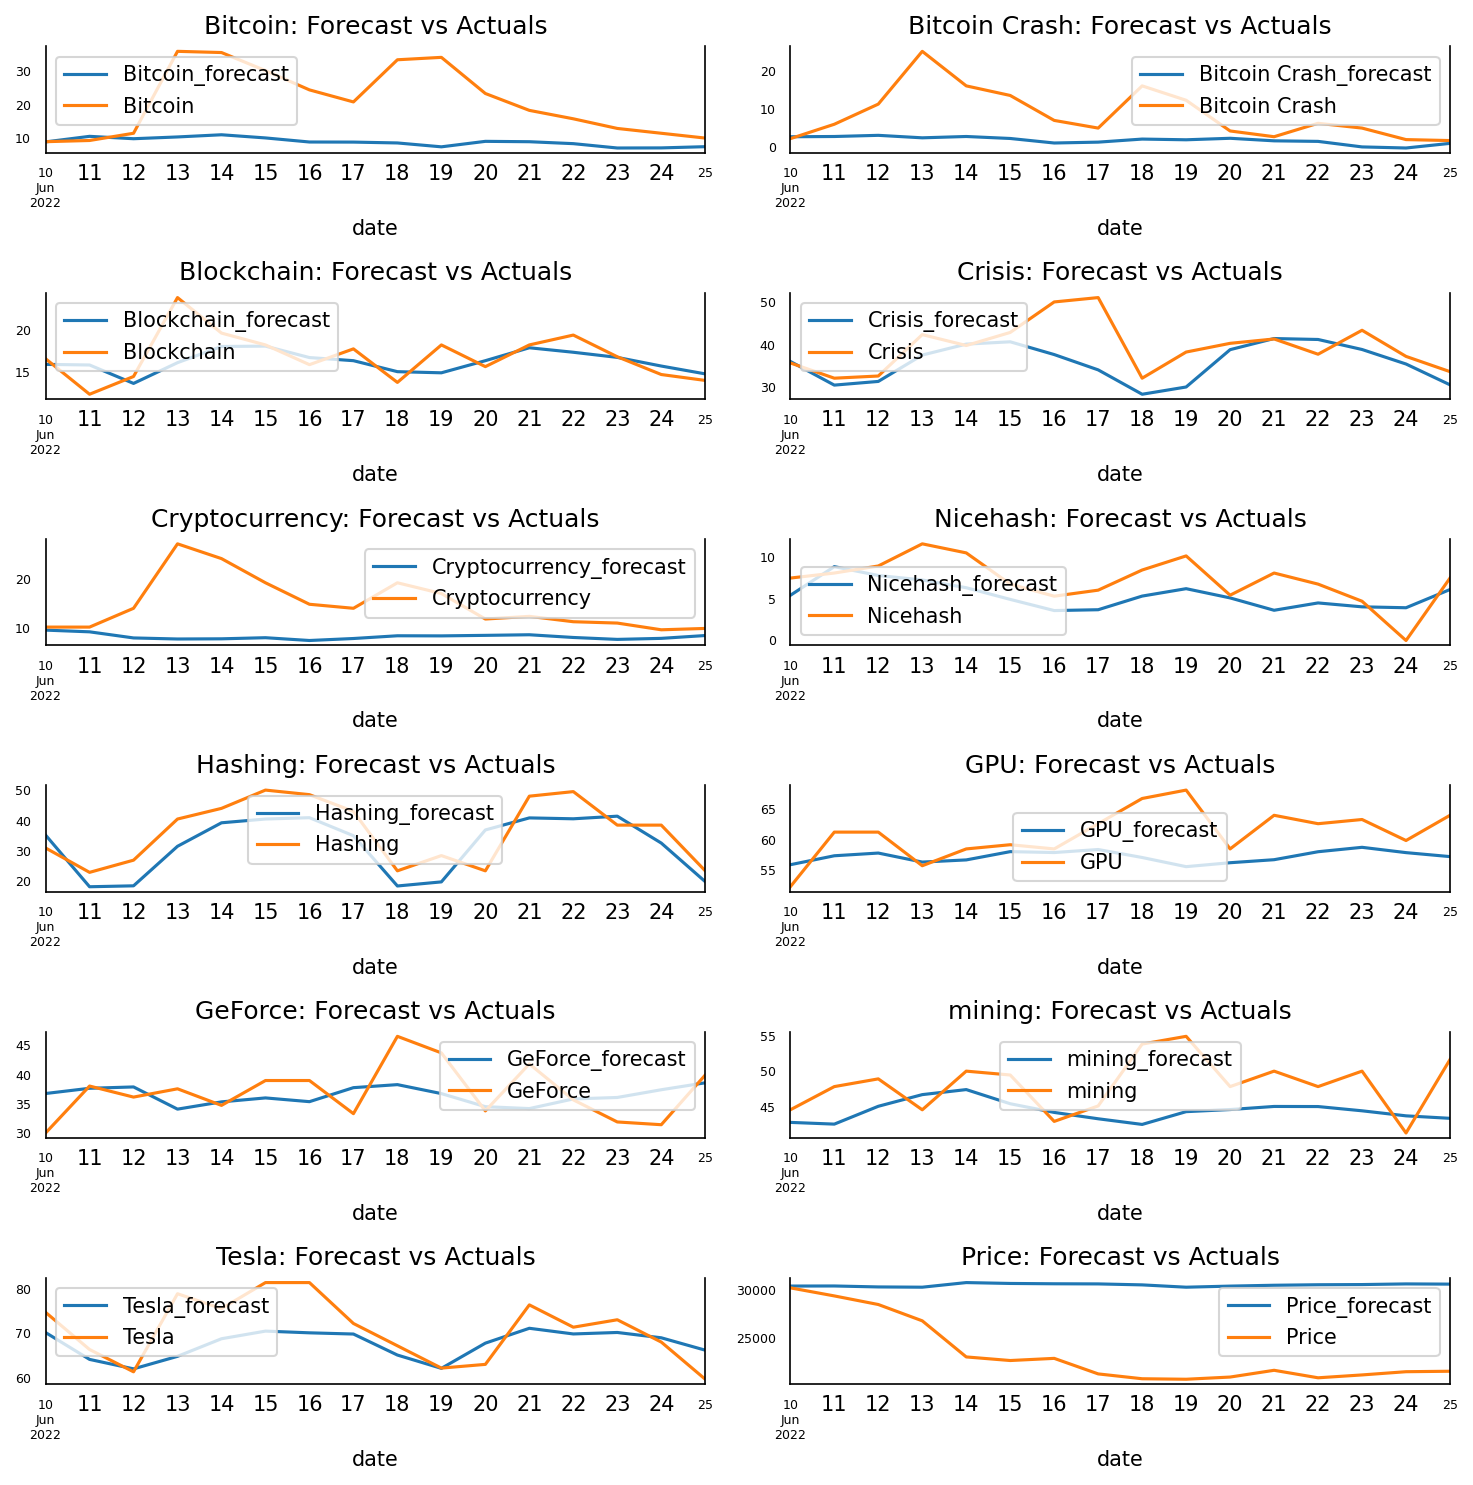

In [16]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# Evaluate the Forecasts

In [17]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

In [18]:
for col in df.columns.values.tolist():
    print('\nForecast Accuracy of: ' + col)
    accuracy_prod = forecast_accuracy(df_results[col + '_forecast'].values, df_test[col])
    for k, v in accuracy_prod.items():
        print(k, ': ', round(v,4))


Forecast Accuracy of: Bitcoin
mape :  0.4848
me :  -12.1105
mae :  12.2655
mpe :  -0.4683
rmse :  15.3975
corr :  0.3327
minmax :  0.4839

Forecast Accuracy of: Bitcoin Crash
mape :  0.7122
me :  -6.6869
mae :  6.7486
mpe :  -0.6848
rmse :  8.9678
corr :  0.4734
minmax :  0.7097

Forecast Accuracy of: Blockchain
mape :  0.0958
me :  -0.6422
mae :  1.6776
mpe :  -0.019
rmse :  2.5244
corr :  0.4952
minmax :  0.0904

Forecast Accuracy of: Crisis
mape :  0.0972
me :  -3.6038
mae :  4.1332
mpe :  -0.0832
rmse :  6.1156
corr :  0.5211
minmax :  0.0967

Forecast Accuracy of: Cryptocurrency
mape :  0.3738
me :  -6.4328
mae :  6.4328
mpe :  -0.3738
rmse :  8.333
corr :  -0.4082
minmax :  0.3738

Forecast Accuracy of: Nicehash
mape :  inf
me :  -1.8063
mae :  2.3894
mpe :  inf
rmse :  2.7483
corr :  0.6153
minmax :  0.3297

Forecast Accuracy of: Hashing
mape :  0.2067
me :  -4.3982
mae :  6.9704
mpe :  -0.1088
rmse :  7.4575
corr :  0.8076
minmax :  0.1924

Forecast Accuracy of: GPU
mape :  0.

C:\Users\silly bb\AppData\Local\Temp\ipykernel_21100\3132832150.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
C:\Users\silly bb\AppData\Local\Temp\ipykernel_21100\3132832150.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
